># <center> <font color='red'> CMPE428 - DATA SCIENCE </font> </center>
>## <center> <font color='blue'> Assignment 4 - Linear Regression [SOLUTION]</font>  </center>

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

Consider the Life Expectancy dataset. The life expectancy (dependent variable, in column D) is going to be predicted using the attributes in columns E to V (independent variables, predictors).

Read the dataset into the variable df

In [65]:
df=pd.read_csv("Life Expectancy Data.csv")

Display the top 10 rows of the dataset

In [66]:
print(df.head(10))

       Country  Year      Status  LifeExpectancy  AdultMortality  \
0  Afghanistan  2015  Developing            65.0           263.0   
1  Afghanistan  2014  Developing            59.9           271.0   
2  Afghanistan  2013  Developing            59.9           268.0   
3  Afghanistan  2012  Developing            59.5           272.0   
4  Afghanistan  2011  Developing            59.2           275.0   
5  Afghanistan  2010  Developing            58.8           279.0   
6  Afghanistan  2009  Developing            58.6           281.0   
7  Afghanistan  2008  Developing            58.1           287.0   
8  Afghanistan  2007  Developing            57.5           295.0   
9  Afghanistan  2006  Developing            57.3           295.0   

   InfantDeaths  Alcohol  PercentageExpenditure  HepatitisB  Measles  ...  \
0            62     0.01              71.279624        65.0     1154  ...   
1            64     0.01              73.523582        62.0      492  ...   
2            66     

Discard the First three columns of the dataset

In [67]:
print(df.head(10).iloc[:, 3:])

   LifeExpectancy  AdultMortality  InfantDeaths  Alcohol  \
0            65.0           263.0            62     0.01   
1            59.9           271.0            64     0.01   
2            59.9           268.0            66     0.01   
3            59.5           272.0            69     0.01   
4            59.2           275.0            71     0.01   
5            58.8           279.0            74     0.01   
6            58.6           281.0            77     0.01   
7            58.1           287.0            80     0.03   
8            57.5           295.0            82     0.02   
9            57.3           295.0            84     0.03   

   PercentageExpenditure  HepatitisB  Measles   BMI  UnderFiveDeaths  Polio  \
0              71.279624        65.0     1154  19.1               83    6.0   
1              73.523582        62.0      492  18.6               86   58.0   
2              73.219243        64.0      430  18.1               89   62.0   
3              78.18421

Display the names of the dependent variables

In [68]:
dependent_variable_name = 'LifeExpectancy'
print(f"The dependent variable for this analysis is: {dependent_variable_name}")

The dependent variable for this analysis is: LifeExpectancy


Count and report the number of missing values in each variable (including both the dependent and independent variables)

In [69]:
print(df.isnull().sum())

Country                           0
Year                              0
Status                            0
LifeExpectancy                   10
AdultMortality                   10
InfantDeaths                      0
Alcohol                         194
PercentageExpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
UnderFiveDeaths                   0
Polio                            19
TotalExpenditure                226
Diphtheria                       19
HIV_AIDS                          0
GDP                             448
Population                      652
Thinness_1_19years               34
Thinness_5_9years                34
IncomeCompositionOfResources    167
Schooling                       163
dtype: int64


Impute the missing values in by their most mean values. All variables are numerical.

In [70]:
for col in df.columns:
  if df[col].isnull().any():
   df[col] = df[col].fillna(df[col].mean())
print(df.isnull().sum())

Country                         0
Year                            0
Status                          0
LifeExpectancy                  0
AdultMortality                  0
InfantDeaths                    0
Alcohol                         0
PercentageExpenditure           0
HepatitisB                      0
Measles                         0
BMI                             0
UnderFiveDeaths                 0
Polio                           0
TotalExpenditure                0
Diphtheria                      0
HIV_AIDS                        0
GDP                             0
Population                      0
Thinness_1_19years              0
Thinness_5_9years               0
IncomeCompositionOfResources    0
Schooling                       0
dtype: int64


Provide a correlation plot for the variables in the dataset, including the dependent variable. Comment on the strengths on the predictors. Comment on the correlations between predictors.

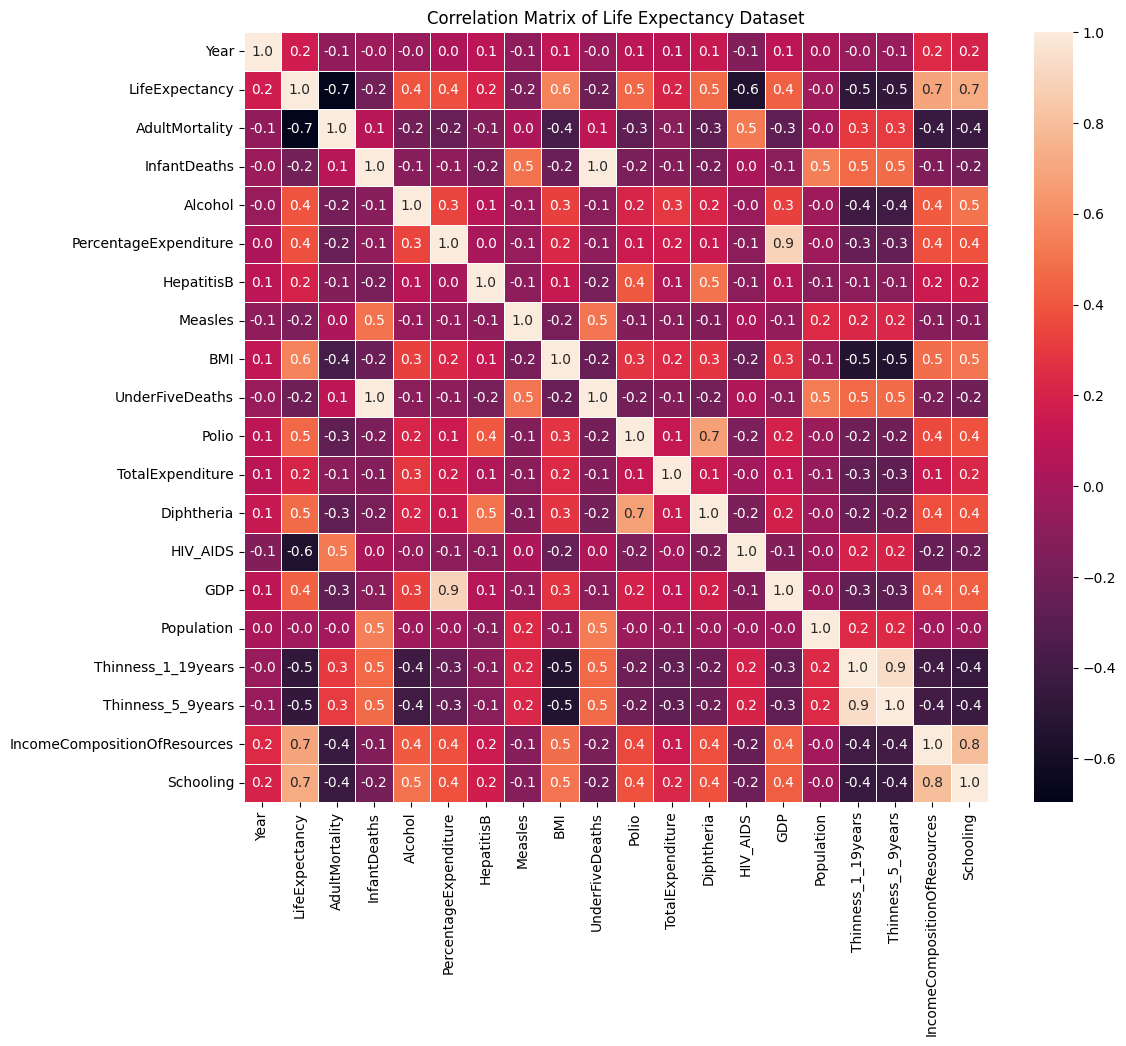

In [71]:
df_numeric_only = df.select_dtypes(include=['number'])
cormat = df_numeric_only.corr()
f,ax = plt.subplots(figsize = (12,10))
sns.heatmap(cormat, annot = True, linewidths = .4, fmt = '.1f',ax=ax)
plt.title('Correlation Matrix of Life Expectancy Dataset')
plt.show()

After adding a constant column to the dataset, determine which independent variable is the most related with the dependent variable by developing a linear regression model between the dependent variable and each independent variable (include the const column as well). Rank the predictors according to the Adjusted R2 values of the linear models obtained.

HINT: Form a dictionary (named as RsqrDict) where each item is the name of the predictor and the value is the corresponding Adjusted R2 value. Then sort according the the values using <RsqrDict_Sorted = sorted(RsqrDict, key=RsqrDict.get, reverse = True)>

In [72]:
import statsmodels.api as sm
data = sm.add_constant(df_numeric_only)

indPredictors = list(data.columns)
indPredictors.remove('const')
indPredictors.remove('LifeExpectancy')
RsqrDict = {}

for variable in indPredictors:
    model = sm.OLS(data['LifeExpectancy'], data[['const', variable]]).fit()
    RsqrDict[variable] = model.rsquared_adj

print("The Adjusted Rsquared Values For Each Predictor")
print(RsqrDict)

RsqrDict_Sorted = sorted(RsqrDict, key=RsqrDict.get, reverse = True)
print("\nThe Sorted List of Predictor (decending order)")
print(RsqrDict_Sorted)

The Adjusted Rsquared Values For Each Predictor
{'Year': np.float64(0.02844102357131184), 'AdultMortality': np.float64(0.484740856644585), 'InfantDeaths': np.float64(0.0382985639765161), 'Alcohol': np.float64(0.15306089062767714), 'PercentageExpenditure': np.float64(0.1454735477925454), 'HepatitisB': np.float64(0.04119634188773946), 'Measles': np.float64(0.0244973657692511), 'BMI': np.float64(0.31253242441167806), 'UnderFiveDeaths': np.float64(0.0491838575702247), 'Polio': np.float64(0.21278231555740712), 'TotalExpenditure': np.float64(0.04293007366978929), 'Diphtheria': np.float64(0.22575902446895202), 'HIV_AIDS': np.float64(0.3094090539271869), 'GDP': np.float64(0.1850467608996046), 'Population': np.float64(4.517121407443536e-05), 'Thinness_1_19years': np.float64(0.22267217310456133), 'Thinness_5_9years': np.float64(0.21747638152344995), 'IncomeCompositionOfResources': np.float64(0.4793551641975067), 'Schooling': np.float64(0.5111534262178159)}

The Sorted List of Predictor (decendin

Compute a linear regression model using all independent variables and report the Adjusted R2 value.

In [73]:
Y = df_numeric_only['LifeExpectancy']
X = df_numeric_only.drop(columns=['LifeExpectancy'])

X = sm.add_constant(X)

model_all = sm.OLS(Y, X).fit()
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:         LifeExpectancy   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     688.5
Date:                Sun, 09 Nov 2025   Prob (F-statistic):               0.00
Time:                        19:31:43   Log-Likelihood:                -8285.3
No. Observations:                2938   AIC:                         1.661e+04
Df Residuals:                    2918   BIC:                         1.673e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Using the p-values, discard the weakly related variables using backward selection until all retained predictors have p-values < 0.05

In [74]:
import statsmodels.api as sm

def backward_selection(X, Y, significance_level=0.05):
    features = list(X.columns)
    while True:
        if 'const' in X.columns and 'const' not in features:
            features.insert(0, 'const')
        model = sm.OLS(Y, X[features]).fit()
        p_values = model.pvalues

        p_values_to_check = p_values.drop('const', errors='ignore')

        if p_values_to_check.empty or p_values_to_check.max() < significance_level:
            break

        redundant_feature = p_values_to_check.idxmax()
        max_p_value = p_values_to_check.max()

        if max_p_value >= significance_level:
            features.remove(redundant_feature)
            print(f"Removed '{redundant_feature}' with p-value: {max_p_value:.4f}")
        else:
            break
    return model

final_model_full_selection = backward_selection(X, Y)

print("\nSummary of the final model after backward selection:")
print(final_model_full_selection.summary())

Removed 'Thinness_5_9years' with p-value: 0.9927
Removed 'Population' with p-value: 0.9636
Removed 'Year' with p-value: 0.3398
Removed 'PercentageExpenditure' with p-value: 0.1126

Summary of the final model after backward selection:
                            OLS Regression Results                            
Dep. Variable:         LifeExpectancy   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     872.0
Date:                Sun, 09 Nov 2025   Prob (F-statistic):               0.00
Time:                        19:31:43   Log-Likelihood:                -8287.0
No. Observations:                2938   AIC:                         1.661e+04
Df Residuals:                    2922   BIC:                         1.670e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                  

Compare the weights with the correlation values and comment.

In [75]:
final_coefficients = final_model_full_selection.params.drop('const')

correlation_with_life_expectancy = cormat['LifeExpectancy'].drop('LifeExpectancy', errors='ignore')

comparison_df = pd.DataFrame({
    'Coefficient': final_coefficients,
    'Correlation with LifeExpectancy': correlation_with_life_expectancy.loc[final_coefficients.index]
})

print(comparison_df.sort_values(by='Correlation with LifeExpectancy', ascending=False))

                              Coefficient  Correlation with LifeExpectancy
Schooling                        0.671164                         0.715066
IncomeCompositionOfResources     5.949483                         0.692483
BMI                              0.042884                         0.559255
Diphtheria                       0.039760                         0.475418
Polio                            0.028510                         0.461574
GDP                              0.000054                         0.430493
Alcohol                          0.125392                         0.391598
TotalExpenditure                 0.095611                         0.207981
HepatitisB                      -0.014586                         0.203771
Measles                         -0.000021                        -0.157574
InfantDeaths                     0.099677                        -0.196535
UnderFiveDeaths                 -0.074450                        -0.222503
Thinness_1_19years       